In [1]:
from datetime import datetime
import matplotlib.pyplot as plt

import numpy as np
import torch

import sys
sys.path.append('../../tensnet/src/')
import tensnet as tt

torch.set_default_dtype(torch.float64)

In [6]:
Li = 10
d = 2

encoding_prefix = "seq"
opt_method = "linsys"
noq = 3 * Li
bd_max = 100
T = 20

var = 1729581831

repo_name = f'{encoding_prefix}_{opt_method}_noq_{noq}_BD_{bd_max}_iter_{T}_{var}'

SPECTRUM

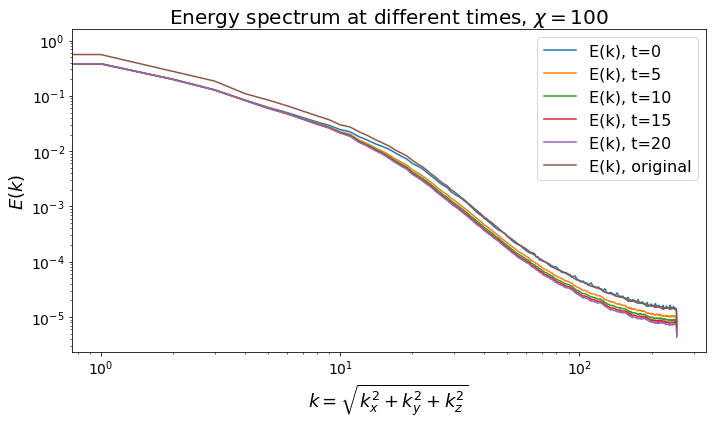

In [7]:
times = [0, 5, 10, 15, 20]
Ek_dict = {}

# Load the tensors into the dictionary
for time in times:
    Ek_dict[time] = torch.load(f'/Users/stefanopisoni/NoSync/3D_evolution/stat_tt/{repo_name}/E_k_{time}.tens')


# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Plot each tensor from the dictionary
for time in times:
    ax.plot(Ek_dict[time], label=f'E(k), t={time}')

# Plot the original E(k) for comparison
E_k_seq_100_tens = torch.load('/Users/stefanopisoni/NoSync/10_qb_cluster_torch/E_k/E_k_seq_100.tens')
ax.plot(E_k_seq_100_tens, label=f'E(k), original')

# Set scales and labels with larger font sizes
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=16)  # Doubling font size for legend

# Doubling font size for labels and title
plt.xlabel(r'$k = \sqrt{k_x^2 + k_y^2 + k_z^2}$', fontsize=18)
plt.ylabel(r'$E(k)$', fontsize=18)
plt.title(rf'Energy spectrum at different times, $\chi = {bd_max}$', fontsize=20)

# Adjust tick parameters for larger font size
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)

plt.tight_layout()
plt.savefig(f"Plots/E_k_{repo_name}.pdf", format="pdf")
plt.show()

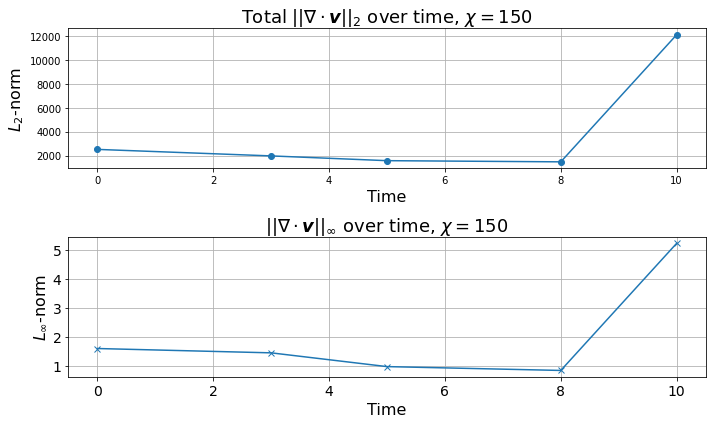

In [7]:
# plt.rc('text', usetex=True)

times = [0, 3, 5, 8, 10]
variables_dict = {}

for time in times:
    for norm in ['linf', 'l2']:
        var_name = f"div_{norm}_{time}"
        variables_dict[var_name] = torch.load(f'/Users/stefanopisoni/NoSync/3D_evolution/stat_tt/{repo_name}/{var_name}.tens')

# Prepare lists to hold the mean values of L2 and Linf norms
l2_values = []
linf_values = []

# Extract mean values from the loaded tensors
for time in times:
    l2_values.append(variables_dict[f'div_l2_{time}'].mean().item())
    linf_values.append(variables_dict[f'div_linf_{time}'].mean().item())

# Plotting
plt.figure(figsize=(10, 6))

# Plot L2 norm values
plt.subplot(2, 1, 1)
plt.plot(times, l2_values, marker='o')
plt.xlabel(r'Time', fontsize=16)
plt.ylabel(r'$L_2$-norm', fontsize=16)
plt.title(rf'Total $||\nabla \cdot \boldsymbol{{v}}||_2$ over time, $\chi = {bd_max}$', fontsize=18)
plt.grid(True)

# Plot Linf norm values
plt.subplot(2, 1, 2)
plt.plot(times, linf_values, marker='x')
plt.xlabel(r'Time', fontsize=16)
plt.ylabel(r'$L_{\infty}$-norm', fontsize=16)
# plt.title(rf'$||\nabla \cdot \boldsymbol{v}||_{\infty}$ over time, $\chi = {bd_max}$', fontsize=18)
plt.title(rf'$||\nabla \cdot \boldsymbol{{v}}||_{{\infty}}$ over time, $\chi = {bd_max}$', fontsize=18)
plt.grid(True)

# Adjust tick parameters for larger font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig(f"Plots/norms_{repo_name}.pdf", format="pdf")
plt.show()

In [ ]:
t = 10
tt.plot_ux_uy_uz_rect(solution[0][t], solution[1][t], solution[2][t], z_slice=0, L=[Li,Li,Li])